In [1]:
from datetime import datetime, timedelta

import ryvkin_model

import numpy as np
from matplotlib import pyplot as plt

In [2]:
z = 3000000
u = ryvkin_model.aux_fn_invgamma(z)
print(u)
ryvkin_model.aux_fn_gamma(u), z

0.9999998333328945


(3000000.0019250414, 3000000)

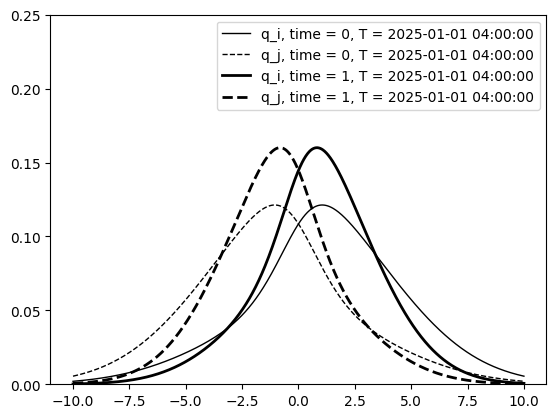

In [3]:
# Test correctness
#
state_space_y = np.linspace(-10, 10, 1001)

time_step = 1 / 24
start_time = datetime(2025, 1, 1, 0, 0, 0)
end_time = datetime(2025, 1, 1, 4, 0, 0)
contest_days = (end_time - start_time).days
contest_seconds = int((end_time - start_time).total_seconds())
contest_hours = int(contest_seconds / 3600)
contest_timegrids = np.arange(start_time, end_time, \
		timedelta(hours=1), dtype=np.datetime64)

equilibrium_graph = np.zeros(
	shape=(contest_timegrids.shape[0], len(state_space_y), 2),
	dtype=np.float64
)
for idx_t, t in enumerate(contest_timegrids[:2]):
	for idx_y, y in enumerate(state_space_y):
		qi, qj = ryvkin_model.get_equilibrium_efforts(
			y, t, end_time,
			prize=1, c_i=1, c_j=1, innov_uncert=1)
		equilibrium_graph[idx_t, idx_y] = (qi, qj)

plt.ylim(0, 0.25)
plt.plot(state_space_y, equilibrium_graph[0, :, 0], label=f'q_i, time = {0}, T = {end_time}',
		linewidth=1, color = 'black', linestyle='solid')
plt.plot(state_space_y, equilibrium_graph[0, :, 1], label=f'q_j, time = {0}, T = {end_time}',
		linewidth=1, color = 'black', linestyle='dashed')
plt.plot(state_space_y, equilibrium_graph[1, :, 0], label=f'q_i, time = {1}, T = {end_time}',
		linewidth=2, color = 'black', linestyle='solid')
plt.plot(state_space_y, equilibrium_graph[1, :, 1], label=f'q_j, time = {1}, T = {end_time}',
		linewidth=2, color = 'black', linestyle='dashed')
plt.legend()
plt.show()

In [4]:
# Test robustness
# If `sigma` is sufficiently large, the numerical solution is robust
#
qi, qj = ryvkin_model.get_equilibrium_efforts(y, t, T=end_time,
		prize=30,
		c_i=1,
		c_j=1,
		innov_uncert=1
)
qi, qj

(np.float64(0.00999157733307539), np.float64(9.087286646794816e-15))